In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

y_0 = [0,1,0,1,1,0,1,1,1,0,1,1,1,1]
print('1. 원래 y값\n', y_0, type(y_0))
y_c = to_categorical(y) # num_classes = 2 없어도 자동으로 클래스 2개로 변환됨.  변환후 반드시 .shape 확인해야 함.
print('2. 0,1값 원핫인코딩\n', y_c, type(y_c), y_c.shape)
y_r = np.argmax(y_c, axis=1)
print('3. 복구한 y값\n', y_r, type(y_r), y_r.shape)

y_0 = list('ABABBABBBABBBB')
print('1. 원래 y값\n', y_0, type(y_0))
y_c = to_categorical(y) # 숫자로 변환된다.  그래서 데이터 전처리할때 가급적 object label 은 인코딩해준다.  X값은 Ordinal 아닌 단순 레이블이면 원핫인코딩, y값은 LabelEncoding 해준다.
y_r = np.argmax(y_c, axis=1)
print('3. 복구한 y값\n', y_r, type(y_r), y_r.shape)

1. 원래 y값
 [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] <class 'list'>
2. 0,1값 원핫인코딩
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]] <class 'numpy.ndarray'> (2000, 2)
3. 복구한 y값
 [1 0 1 ... 0 1 1] <class 'numpy.ndarray'> (2000,)
1. 원래 y값
 ['A', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B'] <class 'list'>
2. 0,1값 원핫인코딩
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]] <class 'numpy.ndarray'> (2000, 2)
3. 복구한 y값
 [1 0 1 ... 0 1 1] <class 'numpy.ndarray'> (2000,)


[[ 0.21513748 -0.29239048]
 [-0.64034564  0.82551475]
 [-0.2528462   0.47169862]
 [ 0.83322633 -0.66472276]
 [-0.04159827  0.44556277]]
[1 0 1 0 1]


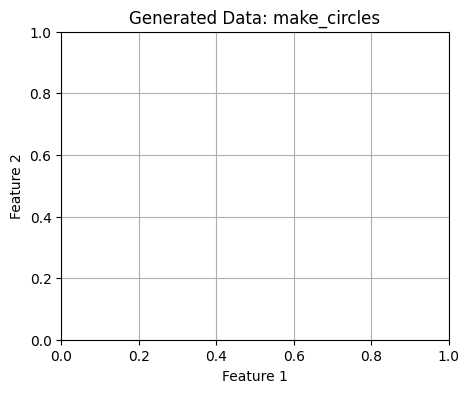

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# 데이터 생성
X, y = make_circles(n_samples=2000, shuffle=True, factor=0.5, noise=0.08, random_state=42)
print(X[0:5])
print(y[0:5])

# 데이터 시각화
plt.figure(figsize=(5, 4))
plt.title("Generated Data: make_circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
from sklearn.cluster import DBSCAN

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=0.1, min_samples=10)  # eps: 반경, min_samples: 최소 이웃 개수

# 군집화 수행
labels = dbscan.fit_predict(X)  # X는 make_moons로 생성된 데이터

# 군집 레이블 확인
print("Cluster Labels:", labels)

Cluster Labels: [0 1 0 ... 1 0 0]


In [25]:
# 다른 방법으로는
print(pd.Series(labels).value_counts())

 0    997
 1    985
-1     18
Name: count, dtype: int64


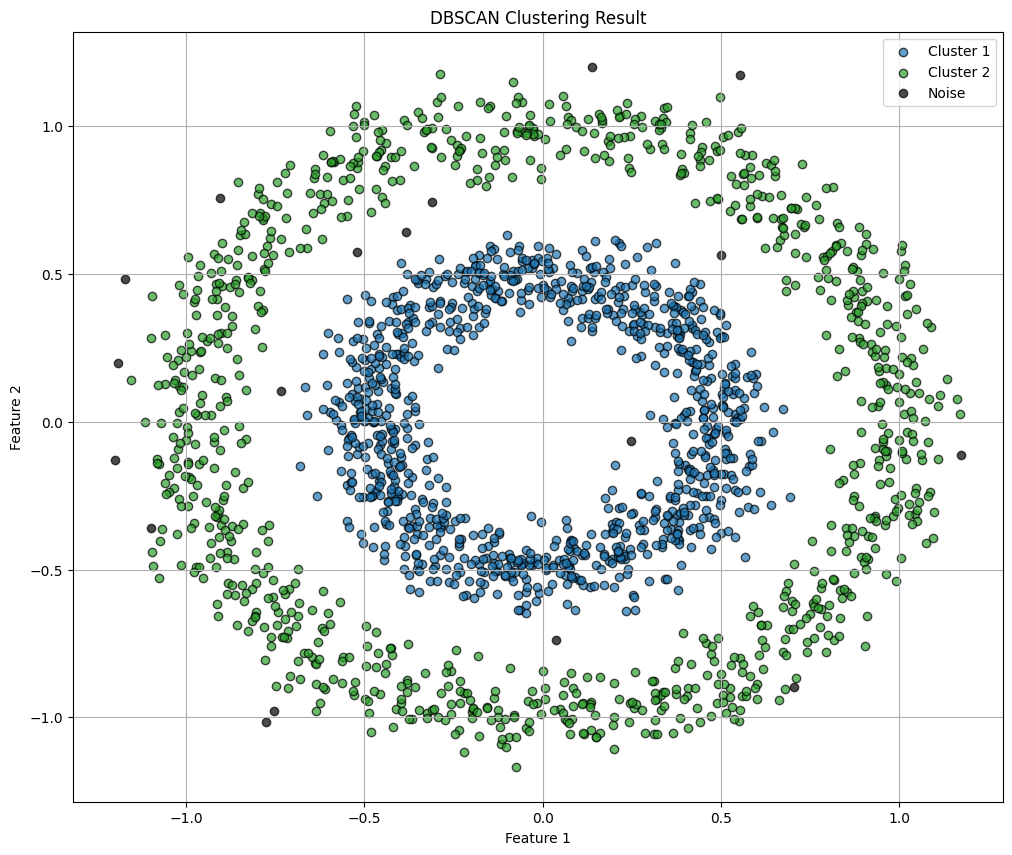

In [4]:
import matplotlib.pyplot as plt

# 4. DBSCAN 결과 시각화
plt.figure(figsize=(12, 10))
unique_labels = set(labels)  # 고유한 레이블 추출

for label in unique_labels:
    # 노이즈 처리
    if label == -1:
        color = "black"
        label_name = "Noise"
    else:
        color = plt.cm.tab10(label / (len(unique_labels) + 1))  # 색상 설정
        label_name = f"Cluster {label + 1}"  # 군집 이름 설정
    
    # 각 군집에 해당하는 데이터 시각화
    plt.scatter(
        X[labels == label, 0],
        X[labels == label, 1],
        c=[color],
        label=label_name,
        alpha=0.7,
        edgecolor="k"
    )

plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
